<a href="https://colab.research.google.com/github/Ranjana05b/CreditRisk/blob/main/Credit_Risk_Project_by_Ranjana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task-1: Problem Statement  

Task-2: Data Exploration and Validation

Task-3: Data Cleaning

Task-4: Model Building Simple Models(Logistic Regregression and
Decision trees)

Task-5: Model Validation metrics calculation

Task-6: Handling Class imbalance(Rebuild Simple ML models)

Task-7: Feature Engineering

Task-8: Ensemble Methods - XGB and RF

Task-9: Model presentation

Task-10: Interview questions on the project




# Project Objective
## Background
## Goal, Number of Resources, Business Impact, Time Taken



**Background:**

Credit risk prediction plays a crucial role in the financial industry, helping banks and financial institutions assess the likelihood of a customer defaulting on credit payments. This project focuses on building a predictive model to identify the probability of clients defaulting based on various factors such as demographic information, payment history, and credit balance.


**Goal:**

The goal of this project is to develop a robust credit risk prediction model that can predict whether a client will default on their payment in the next month. The model will utilize various machine learning algorithms to analyze and predict outcomes based on historical data.

# DATA DICTIONARY

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default_payment_next_month: Default payment (1=yes, 0=No)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Data Exploration and Validation


# Download from Github

Create a logionid on github
Upload your file on to github, then use the link here


https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

In [2]:
import pandas as pd
credit_risk_data=pd.read_csv("https://raw.githubusercontent.com/datavedi1/my_datasets/main/credit_risk_data/UCI_Credit_Card.csv")
credit_risk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

# Data Exploration

In [3]:
credit_risk_data.shape

(30000, 25)

In [4]:
credit_risk_data.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default.payment.next.month'], dtype=object)

## Discrete/Categorical Variables Exploration

In [5]:
credit_risk_data.dtypes

,0
ID,int64
LIMIT_BAL,float64
SEX,int64
EDUCATION,int64
MARRIAGE,int64
AGE,int64
PAY_0,int64
PAY_2,int64
PAY_3,int64
PAY_4,int64


In [6]:
pd.set_option('display.max_columns', None)
credit_risk_data.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,0,0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,0,0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,-1,-1,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [7]:
credit_risk_data = credit_risk_data.drop('ID', axis=1)

In [8]:
filtered_data = credit_risk_data[['PAY_0', 'BILL_AMT1']][credit_risk_data['PAY_0'] == -2]
filtered_data

,PAY_0,BILL_AMT1
9,-2,0.0
23,-2,5512.0
33,-2,10929.0
34,-2,13709.0
45,-2,0.0
...,...,...
29946,-2,5419.0
29961,-2,0.0
29979,-2,0.0
29983,-2,1822.0


**Categorical Variables:**

**SEX** (Gender: 1=male, 2=female)

**EDUCATION** (Education level: 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

**MARRIAGE** (Marital status: 1=married, 2=single, 3=others)

**default_payment_next_month**(Default payment status: 1=yes, 0=no)

**Discrete Variables:**

**PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6** (Repayment status: -1=pay duly, 1=payment delay for one month, etc.)

**Continuous Variables:**

**AGE** (Age in years)

**LIMIT_BAL** (Amount of given credit in NT dollars)

**BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6**(Bill statement amounts for different months in NT dollars)

**PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6** (Previous payment amounts for different months in NT dollars)

#Discrete and Categorical Variables

## Cat Var1 SEX

SEX
2    18112
1    11888
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='SEX'>

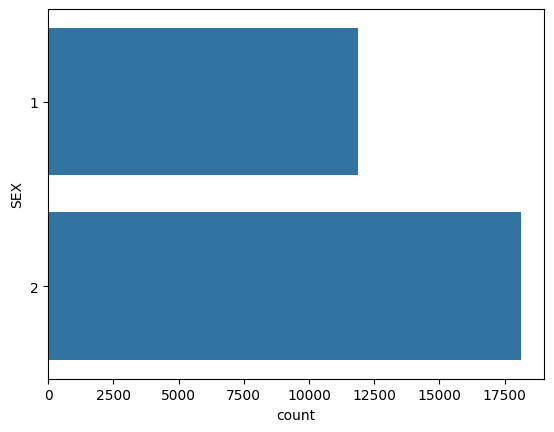

In [9]:
print(credit_risk_data['SEX'].value_counts())
sns.countplot(y="SEX",  data=credit_risk_data)

## Cat Var 2 EDUCATION

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='EDUCATION'>

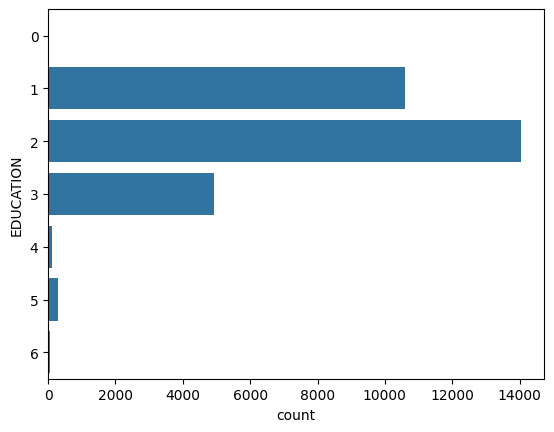

In [10]:
print(credit_risk_data['EDUCATION'].value_counts())
sns.countplot(y="EDUCATION",  data=credit_risk_data)
# Category 1, 5 and 6 are undocumented so need to be checked

Findings

## Cat Var 3 MARRIAGE

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='MARRIAGE'>

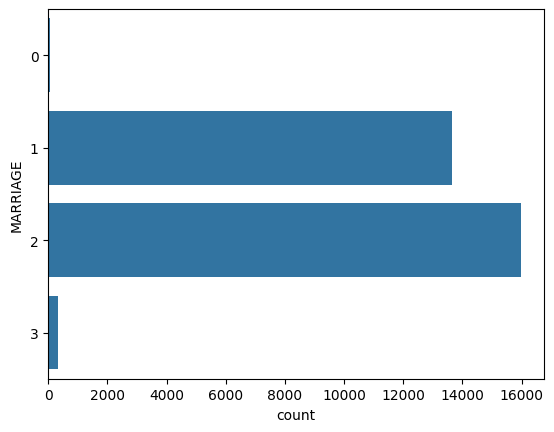

In [11]:
print(credit_risk_data['MARRIAGE'].value_counts())
sns.countplot(y="MARRIAGE",  data=credit_risk_data)
# category 0 is not documented need to be checked

## Disc Var4 PAY 0

PAY_0
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='PAY_0'>

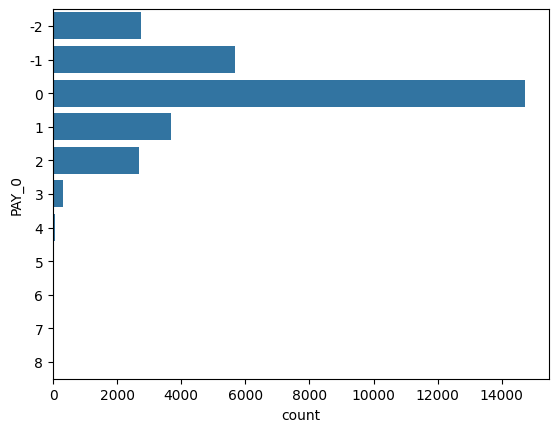

In [12]:
print(credit_risk_data['PAY_0'].value_counts())
sns.countplot(y="PAY_0",  data=credit_risk_data)
# All the pay had outliers "0" and "-2" values, which are not documented.
# Given category -1 as pay duly (properly paid on time)
# So -2, 0, -1 can be treated as one category.

## Disc Var 5 PAY 2

PAY_2
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='PAY_2'>

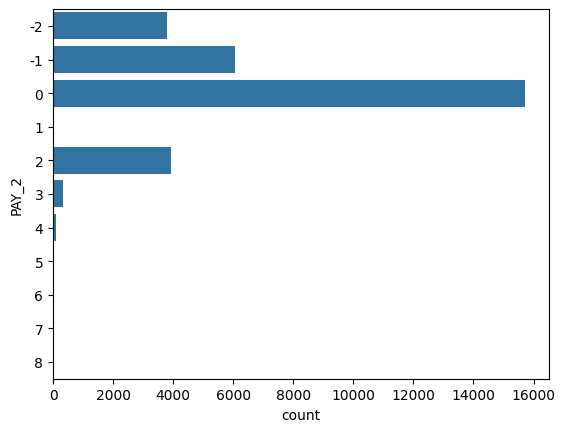

In [13]:
print(credit_risk_data['PAY_2'].value_counts())
sns.countplot(y="PAY_2",  data=credit_risk_data)

Findings

## Disc Var 6 PAY 3

PAY_3
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='PAY_3'>

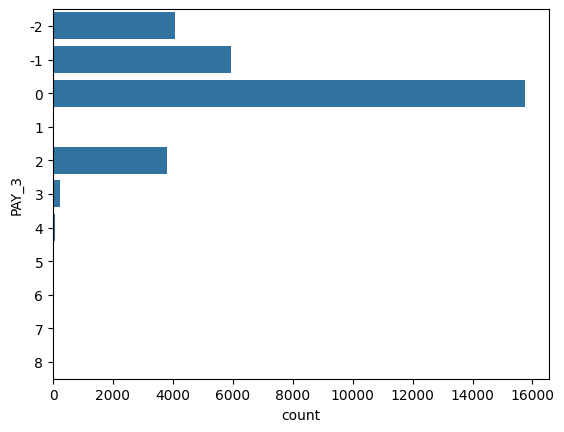

In [14]:
print(credit_risk_data['PAY_3'].value_counts())
sns.countplot(y="PAY_3",  data=credit_risk_data)

## Disc Var 7 PAY 4

PAY_4
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='PAY_4'>

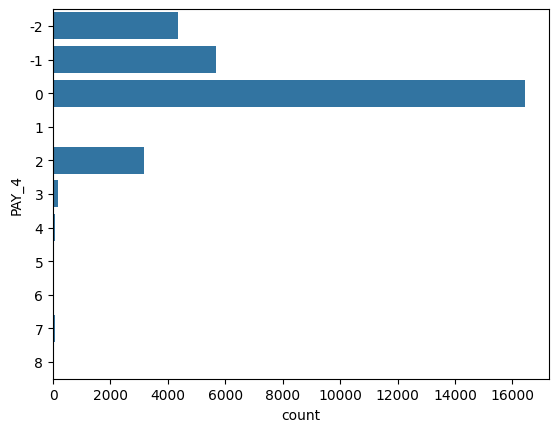

In [15]:
print(credit_risk_data['PAY_4'].value_counts())
sns.countplot(y="PAY_4",  data=credit_risk_data)

## Disc Var 8 PAY 5

PAY_5
 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='PAY_5'>

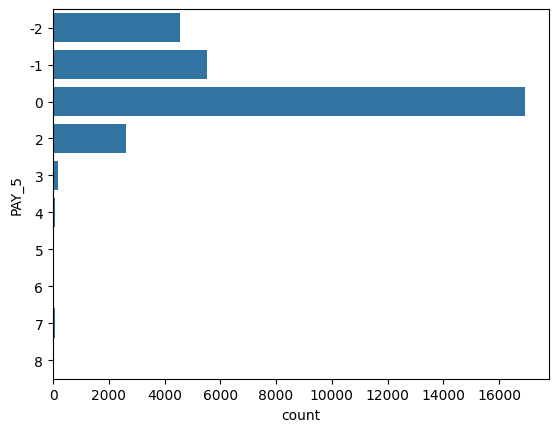

In [16]:
print(credit_risk_data['PAY_5'].value_counts())
sns.countplot(y="PAY_5",  data=credit_risk_data)

## Disc Var 9 PAY 6

PAY_6
 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='PAY_6'>

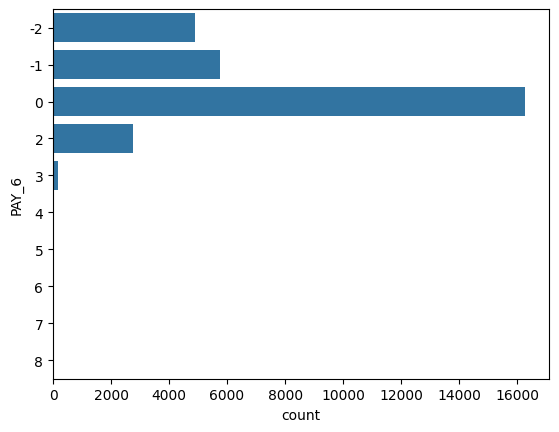

In [17]:
print(credit_risk_data['PAY_6'].value_counts())
sns.countplot(y="PAY_6",  data=credit_risk_data)

## Cat Var 10 DEFAULT PAYMENT

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='default.payment.next.month'>

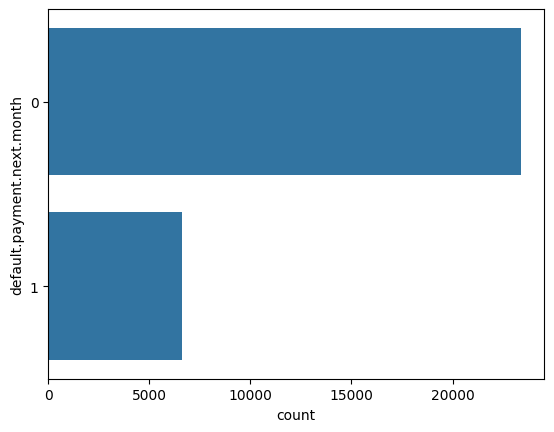

In [18]:
print(credit_risk_data['default.payment.next.month'].value_counts())
sns.countplot(y="default.payment.next.month",  data=credit_risk_data)

## Continuous Variables Exploration

## Continuous Var1 AGE

In [19]:
age_percentile = credit_risk_data['AGE'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
age_percentile

,AGE
0.1,25.0
0.2,27.0
0.3,29.0
0.4,31.0
0.5,34.0
0.6,37.0
0.7,40.0
0.8,43.0
0.9,49.0
1.0,79.0


In [20]:
age_percentile = credit_risk_data['AGE'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
age_percentile

,AGE
0.10,25.0
0.20,27.0
0.30,29.0
0.40,31.0
0.50,34.0
0.60,37.0
0.70,40.0
0.80,43.0
0.90,49.0
0.91,49.0


## Continuous Var2 LIMIT BAL

In [21]:
limit_percentile = credit_risk_data['LIMIT_BAL'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
limit_percentile
# plt.boxplot(credit_risk_data["LIMIT_BAL"])

,LIMIT_BAL
0.1,30000.0
0.2,50000.0
0.3,70000.0
0.4,100000.0
0.5,140000.0
0.6,180000.0
0.7,210000.0
0.8,270000.0
0.9,360000.0
1.0,1000000.0


In [22]:
limit_percentile = credit_risk_data['LIMIT_BAL'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
limit_percentile

,LIMIT_BAL
0.10,30000.0
0.20,50000.0
0.30,70000.0
0.40,100000.0
0.50,140000.0
0.60,180000.0
0.70,210000.0
0.80,270000.0
0.90,360000.0
0.91,360000.0


## Continuous Var3 BILL AMT1

In [23]:
bill_amt1_percentile = credit_risk_data['BILL_AMT1'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
bill_amt1_percentile

,BILL_AMT1
0.1,278.9
0.2,1892.8
0.3,6050.4
0.4,13469.2
0.5,22381.5
0.6,37045.2
0.7,52204.9
0.8,83421.2
0.9,142133.7
1.0,964511.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7a3d0f61bb90>,
 'caps': [<matplotlib.lines.Line2D at 0x7a3d0f434e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a3d0f7b68d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a3d0f436310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a3d0f436b90>],
 'means': []}

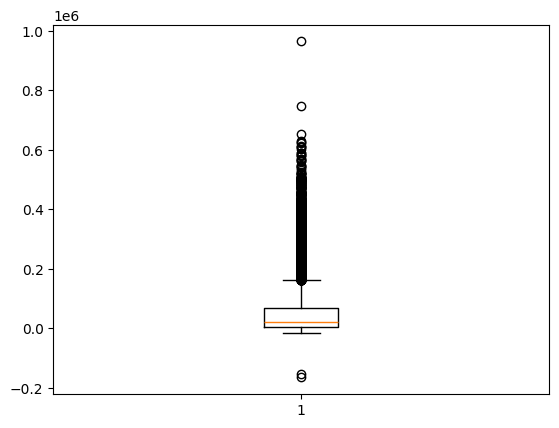

In [24]:
plt.boxplot(credit_risk_data["BILL_AMT1"])

In [25]:
bill_amt1_percentile = credit_risk_data['BILL_AMT1'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
bill_amt1_percentile

,BILL_AMT1
0.10,278.90
0.20,1892.80
0.30,6050.40
0.40,13469.20
0.50,22381.50
0.60,37045.20
0.70,52204.90
0.80,83421.20
0.90,142133.70
0.91,151214.72


Findings

## Continuous Var4 BILL AMT2

In [26]:
bill_amt2_percentile = credit_risk_data['BILL_AMT2'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
bill_amt2_percentile

,BILL_AMT2
0.1,0.0
0.2,1472.8
0.3,5500.0
0.4,12799.6
0.5,21200.0
0.6,34773.8
0.7,50690.0
0.8,80292.2
0.9,136905.5
1.0,983931.0


In [27]:
bill_amt2_percentile = credit_risk_data['BILL_AMT2'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
bill_amt2_percentile

,BILL_AMT2
0.10,0.00
0.20,1472.80
0.30,5500.00
0.40,12799.60
0.50,21200.00
0.60,34773.80
0.70,50690.00
0.80,80292.20
0.90,136905.50
0.91,145064.86


## Continuous Var5 BILL AMT3

In [28]:
bill_amt3_percentile = credit_risk_data['BILL_AMT3'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
bill_amt3_percentile

,BILL_AMT3
0.1,0.0
0.2,1187.8
0.3,5219.2
0.4,12197.2
0.5,20088.5
0.6,31401.0
0.7,49217.3
0.8,76777.4
0.9,132051.3
1.0,1664089.0


In [29]:
bill_amt3_percentile = credit_risk_data['BILL_AMT3'].quantile([0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
bill_amt3_percentile

,BILL_AMT3
0.90,132051.30
0.91,139419.08
0.92,148633.24
0.93,160049.77
0.94,173241.34
0.95,187821.05
0.96,203652.80
0.97,228277.79
0.98,263208.54
0.99,325030.39


#Continuous Var6 BILL AMT 4

In [30]:
bill_amt4_percentile = credit_risk_data['BILL_AMT4'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
bill_amt4_percentile

,BILL_AMT4
0.1,0.0
0.2,988.0
0.3,4643.7
0.4,11145.0
0.5,19052.0
0.6,28604.4
0.7,45456.6
0.8,70579.0
0.9,122418.7
1.0,891586.0


In [31]:
bill_amt4_percentile = credit_risk_data['BILL_AMT4'].quantile([0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
bill_amt4_percentile

,BILL_AMT4
0.90,122418.70
0.91,130937.09
0.92,138646.80
0.93,148287.35
0.94,160944.12
0.95,174333.35
0.96,190088.52
0.97,210965.51
0.98,246655.72
0.99,304997.27


#Continuous Var7 BILL AMT5

In [32]:
bill_amt5_percentile = credit_risk_data['BILL_AMT5'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
bill_amt5_percentile

,BILL_AMT5
0.1,0.0
0.2,763.0
0.3,3637.0
0.4,9809.2
0.5,18104.5
0.6,26690.4
0.7,40943.2
0.8,65823.0
0.9,115883.0
1.0,927171.0


In [33]:
bill_amt5_percentile = credit_risk_data['BILL_AMT5'].quantile([0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
bill_amt5_percentile

,BILL_AMT5
0.90,115883.00
0.91,123655.36
0.92,132233.96
0.93,141291.49
0.94,151270.38
0.95,165794.30
0.96,181044.44
0.97,198861.03
0.98,228587.04
0.99,285868.33


Findings

#Continuous Var8 BILL AMT6

In [34]:
bill_amt6_percentile = credit_risk_data['BILL_AMT6'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
bill_amt6_percentile

,BILL_AMT6
0.1,0.0
0.2,476.0
0.3,2701.7
0.4,8770.2
0.5,17071.0
0.6,25508.4
0.7,39252.2
0.8,63150.6
0.9,112110.4
1.0,961664.0


In [35]:
credit_risk_data[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]].quantile([0, 0.01,0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09,
                                                                                                           0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                                                                                           0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1])
# BILL_AMT1 having 1% of negative values
# BILL_AMT2 TO BILL_AMT6 having 2% negative values
# can be treated as extra paid

# look like  bill amount has 1% of outliers - to be cleaned

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0.00,-165580.00,-69777.00,-157264.00,-170000.00,-81334.00,-339603.00
0.01,-81.00,-200.00,-200.00,-212.02,-232.01,-331.03
0.02,0.00,-4.00,-3.00,-3.02,-3.02,-6.00
0.03,0.00,0.00,0.00,0.00,0.00,0.00
0.04,0.00,0.00,0.00,0.00,0.00,0.00
0.05,0.00,0.00,0.00,0.00,0.00,0.00
0.06,0.00,0.00,0.00,0.00,0.00,0.00
0.07,0.00,0.00,0.00,0.00,0.00,0.00
0.08,0.00,0.00,0.00,0.00,0.00,0.00
0.09,131.82,0.00,0.00,0.00,0.00,0.00


<Axes: >

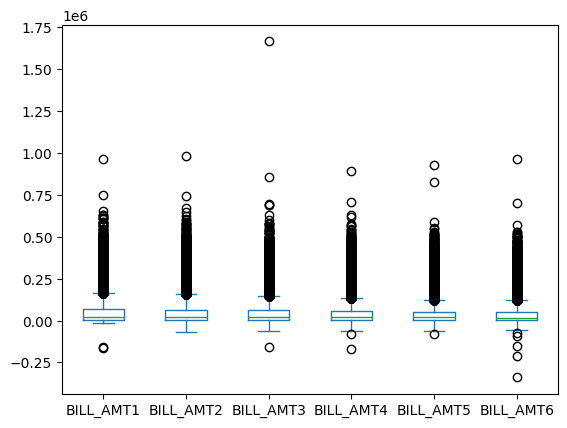

In [36]:
credit_risk_data[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]].plot(kind='box')

## Continuous Var9 PAY AMT1

In [37]:
pay_amt1_percentile = credit_risk_data['PAY_AMT1'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
pay_amt1_percentile

,PAY_AMT1
0.1,0.0
0.2,316.0
0.3,1263.7
0.4,1724.0
0.5,2100.0
0.6,3000.0
0.7,4309.3
0.8,6192.2
0.9,10300.0
1.0,873552.0


In [38]:
pay_amt1_percentile = credit_risk_data['PAY_AMT1'].quantile([0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
pay_amt1_percentile

,PAY_AMT1
0.90,10300.00
0.91,11174.00
0.92,12500.00
0.93,14127.07
0.94,15510.66
0.95,18428.20
0.96,21006.24
0.97,28232.78
0.98,40000.00
0.99,66522.18


{'whiskers': [<matplotlib.lines.Line2D at 0x7a3d0f8e7a90>,
 'caps': [<matplotlib.lines.Line2D at 0x7a3d0f759510>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a3d121b19d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a3d1218df90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a3d0f566710>],
 'means': []}

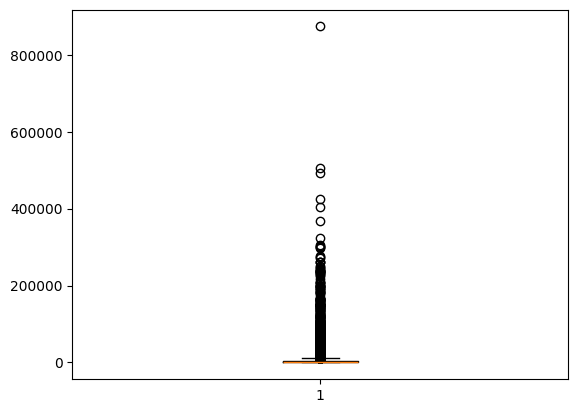

In [39]:
plt.boxplot(credit_risk_data["PAY_AMT1"])

## Continuous Var10 PAY AMT2

In [40]:
pay_amt2_percentile = credit_risk_data['PAY_AMT2'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
pay_amt2_percentile

,PAY_AMT2
0.1,0.0
0.2,268.8
0.3,1165.0
0.4,1600.0
0.5,2009.0
0.6,3000.0
0.7,4045.3
0.8,6000.0
0.9,10401.1
1.0,1684259.0


In [41]:
pay_amt2_percentile = credit_risk_data['PAY_AMT2'].quantile([0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
pay_amt2_percentile

,PAY_AMT2
0.90,10401.10
0.91,11320.00
0.92,12536.16
0.93,14131.26
0.94,16000.00
0.95,19004.35
0.96,21408.36
0.97,29000.00
0.98,41027.88
0.99,76651.02


## Continuous Var11 PAY AMT3

In [42]:
pay_amt3_percentile = credit_risk_data['PAY_AMT3'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
pay_amt3_percentile

,PAY_AMT3
0.1,0.0
0.2,2.8
0.3,780.0
0.4,1206.0
0.5,1800.0
0.6,2500.0
0.7,3560.3
0.8,5284.0
0.9,10000.0
1.0,896040.0


In [43]:
pay_amt3_percentile = credit_risk_data['PAY_AMT3'].quantile([0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
pay_amt3_percentile

,PAY_AMT3
0.90,10000.00
0.91,10288.36
0.92,11558.48
0.93,13000.00
0.94,15000.00
0.95,17589.40
0.96,20150.00
0.97,27000.33
0.98,38661.36
0.99,70000.00


## Continuous Var12 PAY_AMT4

In [44]:
pay_amt4_percentile = credit_risk_data['PAY_AMT4'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
pay_amt4_percentile

,PAY_AMT4
0.1,0.0
0.2,0.0
0.3,500.0
0.4,1000.0
0.5,1500.0
0.6,2100.0
0.7,3200.0
0.8,5000.0
0.9,9570.6
1.0,621000.0


In [45]:
pay_amt4_percentile = credit_risk_data['PAY_AMT4'].quantile([0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
pay_amt4_percentile

,PAY_AMT4
0.90,9570.60
0.91,10000.00
0.92,10404.72
0.93,11985.21
0.94,13949.60
0.95,16014.95
0.96,20000.00
0.97,26665.40
0.98,39634.04
0.99,67054.44


## Continuous Var13 PAY AMT5

In [46]:
pay_amt5_percentile = credit_risk_data['PAY_AMT5'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
pay_amt5_percentile

,PAY_AMT5
0.1,0.0
0.2,0.0
0.3,500.0
0.4,1000.0
0.5,1500.0
0.6,2123.4
0.7,3200.0
0.8,5000.0
0.9,9500.0
1.0,426529.0


In [47]:
pay_amt5_percentile = credit_risk_data['PAY_AMT5'].quantile([0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
pay_amt5_percentile

,PAY_AMT5
0.90,9500.00
0.91,10000.00
0.92,10358.16
0.93,11964.14
0.94,13939.06
0.95,16000.00
0.96,20000.00
0.97,25314.21
0.98,37259.66
0.99,65607.56


## Continuous Var14 PAY AMT6

In [48]:
pay_amt6_percentile = credit_risk_data['PAY_AMT6'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
pay_amt6_percentile

,PAY_AMT6
0.1,0.0
0.2,0.0
0.3,426.0
0.4,1000.0
0.5,1500.0
0.6,2100.0
0.7,3200.0
0.8,5000.0
0.9,9600.0
1.0,528666.0


In [49]:
pay_amt6_percentile = credit_risk_data['PAY_AMT6'].quantile([0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
pay_amt6_percentile

,PAY_AMT6
0.90,9600.00
0.91,10000.00
0.92,10500.00
0.93,12017.14
0.94,14442.86
0.95,17343.80
0.96,21034.88
0.97,29561.76
0.98,45010.48
0.99,82619.05


<Axes: >

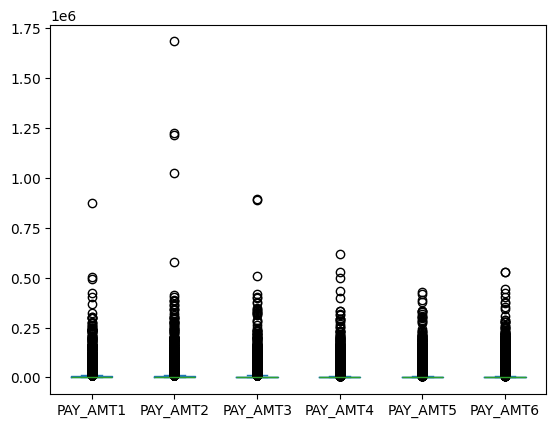

In [50]:
credit_risk_data[["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]].plot(kind='box')

#Findings

**Categorical Variables:**

**SEX and default_payment_next_month** are clean and don't require any modifications. The data is consistent with the predefined categories (1 = male, 2 = female for SEX and 0 = No, 1 = Yes for default).

**EDUCATION** contained an outlier value "0" and "5" and "6" are also unknown, so these three should be one variable.

**MARRIAGE** had an outlier value "0", which was replaced with "3" (others).

Rename Pay_0 to Pay_1

**PAY variables (PAY_0 to PAY_6)** had outliers "0" and "-2" values,which are not documented. Given category -1 as pay duly (properly paid on time)
So -2, 0, -1 can be treated as one category.


**Continuous Variables:**

**AGE** had values greater than 60, which were replaced with the median value of the age column to handle outliers.

**LIMIT_BAL** had extreme values above 500,000, which were replaced with the median to remove outliers.

 **BILL_AMT1** having 1% of negative values

**BILL_AMT2** to **BILL_AMT6** having 2% negative values can be treated as extra paid

Look like  bill amount has 1% of outliers, which were replaced with their respective median values to maintain consistency in the data.

**PAY_AMT1 to PAY_AMT6** contained extreme outliers between the 99th and 100th percentiles, which were replaced with their respective median values.

**Data Transformation:**

**Categorical variables** were cleaned through imputation and replacement of outliers.

**Continuous variables** were adjusted for outliers using median imputation to ensure that extreme values do not distort the analysis.

# Data Cleaning and Data Preparation

#Cat Var1 Cleaning EDUCATION

In [51]:
freq_table_education=credit_risk_data['EDUCATION'].value_counts()
freq_table_education

,count
EDUCATION,
2,14030
1,10585
3,4917
5,280
4,123
6,51
0,14


In [52]:
#Cross tab with target
import pandas as pd
cross_tab_eductaion_target=pd.crosstab(credit_risk_data['EDUCATION'],credit_risk_data['default.payment.next.month'])
cross_tab_eductaion_target

default.payment.next.month,0,1
EDUCATION,,
0,14,0
1,8549,2036
2,10700,3330
3,3680,1237
4,116,7
5,262,18
6,43,8


In [53]:
# SIMPLY CATEGORY 0, 5 AND 6 ARE UNDOCUMENTED SO WE CAN POUR  IT INTO CATEGORY 4 MENTIONED OTHER
UNKNOWN = (credit_risk_data['EDUCATION']== 5) | (credit_risk_data['EDUCATION']== 6) | (credit_risk_data['EDUCATION']== 0)
credit_risk_data.loc[UNKNOWN, 'EDUCATION'] = 4
credit_risk_data['EDUCATION'].value_counts()

,count
EDUCATION,
2,14030
1,10585
3,4917
4,468


#Cat Var2 Cleaning MARRIAGE

In [54]:
freq_table_marriage=credit_risk_data['MARRIAGE'].value_counts()
freq_table_marriage

,count
MARRIAGE,
2,15964
1,13659
3,323
0,54


In [55]:
# CATEGORY 0 IS UNDOCUMNETED SO WE POUR IT INTO CATEGORY 3 MENTIONED AS OTHERS
UNKNOWN = (credit_risk_data['MARRIAGE']== 0)
credit_risk_data.loc[UNKNOWN, 'MARRIAGE'] = 3
credit_risk_data['MARRIAGE'].value_counts()

,count
MARRIAGE,
2,15964
1,13659
3,377


#Cat Var Cleaning PAY 0 to PAY 6

In [56]:
freq_table_pay_0=credit_risk_data['PAY_0'].value_counts()
freq_table_pay_0

,count
PAY_0,
0,14737
-1,5686
1,3688
-2,2759
2,2667
3,322
4,76
5,26
8,19


In [57]:
# CROSS TAB WITH TARGET VARIABLE
cross_tab_PAY0_target=pd.crosstab(credit_risk_data['PAY_0'],credit_risk_data['default.payment.next.month'])
cross_tab_PAY0_target_percent= cross_tab_PAY0_target.apply( lambda x: x/x.sum(), axis=1)
cross_tab_PAY0_target_percent

default.payment.next.month,0,1
PAY_0,,
-2,0.867706,0.132294
-1,0.832219,0.167781
0,0.871887,0.128113
1,0.660521,0.339479
2,0.308586,0.691414
3,0.242236,0.757764
4,0.315789,0.684211
5,0.500000,0.500000
6,0.454545,0.545455


In [58]:
# TREATING CATEGORY -2, -1, 0 VALUES AS ONE CATEGORY 0 FOR PAY DULY
# SO GOING FOR IMPUTATION BASED ON TARGET VARIBALE VALUES NEAREST TO THEM
FILL = (credit_risk_data.PAY_0 == -2) | (credit_risk_data.PAY_0 == -1) | (credit_risk_data.PAY_0 == 0)
credit_risk_data.loc[FILL, 'PAY_0'] = 0
FILL = (credit_risk_data.PAY_2 == -2) | (credit_risk_data.PAY_2 == -1) | (credit_risk_data.PAY_2 == 0)
credit_risk_data.loc[FILL, 'PAY_2'] = 0
FILL = (credit_risk_data.PAY_3 == -2) | (credit_risk_data.PAY_3 == -1) | (credit_risk_data.PAY_3 == 0)
credit_risk_data.loc[FILL, 'PAY_3'] = 0
FILL = (credit_risk_data.PAY_4 == -2) | (credit_risk_data.PAY_4 == -1) | (credit_risk_data.PAY_4 == 0)
credit_risk_data.loc[FILL, 'PAY_4'] = 0
FILL = (credit_risk_data.PAY_5 == -2) | (credit_risk_data.PAY_5 == -1) | (credit_risk_data.PAY_5 == 0)
credit_risk_data.loc[FILL, 'PAY_5'] = 0
FILL = (credit_risk_data.PAY_6 == -2) | (credit_risk_data.PAY_6 == -1) | (credit_risk_data.PAY_6 == 0)
credit_risk_data.loc[FILL, 'PAY_6']=0

#RENAMING PAY_0 AS PAY_1

In [59]:
#RENAMING PAY_0 AS PAY_1
credit_risk_data.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)
credit_risk_data.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,50000.0,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,500000.0,1,1,2,29,0,0,0,0,0,0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,100000.0,2,2,2,23,0,0,0,0,0,0,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,140000.0,2,3,1,28,0,0,2,0,0,0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,20000.0,1,3,2,35,0,0,0,0,0,0,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


#Continuos variable cleaning

## Var1 Limit Bal Cleaning

In [60]:
credit_risk_data.loc[credit_risk_data['LIMIT_BAL'] > 500000, 'LIMIT_BAL'] = credit_risk_data['LIMIT_BAL'].median()

{'whiskers': [<matplotlib.lines.Line2D at 0x7a3d60121250>,
 'caps': [<matplotlib.lines.Line2D at 0x7a3d13057790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a3d60121e90>],
 'medians': [<matplotlib.lines.Line2D at 0x7a3d60187710>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a3d60185810>],
 'means': []}

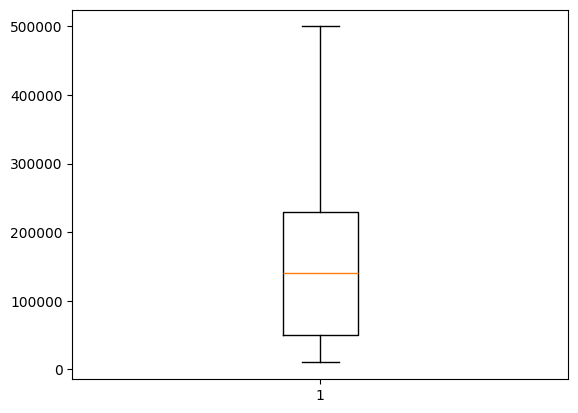

In [61]:
plt.boxplot(credit_risk_data["LIMIT_BAL"])

## Bill Amt1 to Bill amt6 Cleaning

In [62]:
credit_risk_data[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]].quantile([0, 0.01,0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09,
                                                                                                           0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                                                                                           0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1])

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0.00,-165580.00,-69777.00,-157264.00,-170000.00,-81334.00,-339603.00
0.01,-81.00,-200.00,-200.00,-212.02,-232.01,-331.03
0.02,0.00,-4.00,-3.00,-3.02,-3.02,-6.00
0.03,0.00,0.00,0.00,0.00,0.00,0.00
0.04,0.00,0.00,0.00,0.00,0.00,0.00
0.05,0.00,0.00,0.00,0.00,0.00,0.00
0.06,0.00,0.00,0.00,0.00,0.00,0.00
0.07,0.00,0.00,0.00,0.00,0.00,0.00
0.08,0.00,0.00,0.00,0.00,0.00,0.00
0.09,131.82,0.00,0.00,0.00,0.00,0.00


In [63]:
# treating that 1% positive outlier by imputation based on the median value of that column
credit_risk_data.loc[credit_risk_data['BILL_AMT1'] > 350110.68, 'BILL_AMT1'] = credit_risk_data['BILL_AMT1'].median()
credit_risk_data.loc[credit_risk_data['BILL_AMT2'] > 337495.28, 'BILL_AMT2'] = credit_risk_data['BILL_AMT2'].median()
credit_risk_data.loc[credit_risk_data['BILL_AMT3'] > 325030.39, 'BILL_AMT3'] = credit_risk_data['BILL_AMT3'].median()
credit_risk_data.loc[credit_risk_data['BILL_AMT4'] > 304997.27, 'BILL_AMT4'] = credit_risk_data['BILL_AMT4'].median()
credit_risk_data.loc[credit_risk_data['BILL_AMT5'] > 285868.33, 'BILL_AMT5'] = credit_risk_data['BILL_AMT5'].median()
credit_risk_data.loc[credit_risk_data['BILL_AMT6'] > 279505.06, 'BILL_AMT6'] = credit_risk_data['BILL_AMT6'].median()

<Axes: >

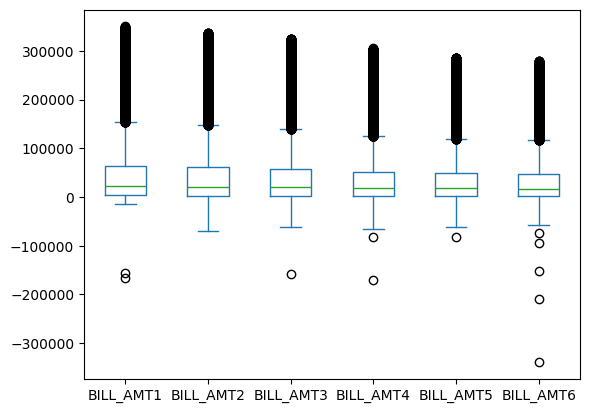

In [64]:
credit_risk_data[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]].plot(kind='box')

In [65]:
# Treating 1% negative outlier of Bill_amt1 and 2% negative oultlier of rest Bill_Amt
#by based on th =e imputation of the negative values of  the columns
credit_risk_data.loc[credit_risk_data['BILL_AMT1'] < 0 , 'BILL_AMT1'] = credit_risk_data['BILL_AMT1'][credit_risk_data['BILL_AMT1']<0].median()
credit_risk_data.loc[credit_risk_data['BILL_AMT2'] < 0 , 'BILL_AMT2'] = credit_risk_data['BILL_AMT2'][credit_risk_data['BILL_AMT2']<0].median()
credit_risk_data.loc[credit_risk_data['BILL_AMT3'] < 0 , 'BILL_AMT3'] = credit_risk_data['BILL_AMT3'][credit_risk_data['BILL_AMT3']<0].median()
credit_risk_data.loc[credit_risk_data['BILL_AMT4'] < 0 , 'BILL_AMT4'] = credit_risk_data['BILL_AMT4'][credit_risk_data['BILL_AMT4']<0].median()
credit_risk_data.loc[credit_risk_data['BILL_AMT5'] < 0 , 'BILL_AMT5'] = credit_risk_data['BILL_AMT5'][credit_risk_data['BILL_AMT5']<0].median()
credit_risk_data.loc[credit_risk_data['BILL_AMT6'] < 0 , 'BILL_AMT6'] = credit_risk_data['BILL_AMT6'][credit_risk_data['BILL_AMT6']<0].median()


<Axes: >

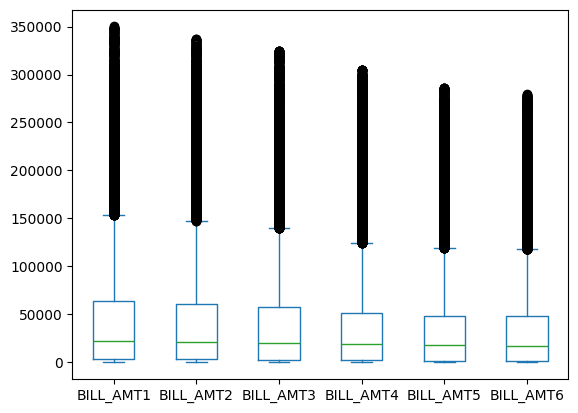

In [66]:
credit_risk_data[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]].plot(kind='box')

##  PAY Amt1  to PAY Amt6 Cleaning

In [67]:
credit_risk_data[["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]].quantile([0, 0.01,0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09,
                                                                                                           0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                                                                                           0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1])

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.01,0.00,0.00,0.00,0.00,0.00,0.00
0.02,0.00,0.00,0.00,0.00,0.00,0.00
0.03,0.00,0.00,0.00,0.00,0.00,0.00
0.04,0.00,0.00,0.00,0.00,0.00,0.00
0.05,0.00,0.00,0.00,0.00,0.00,0.00
0.06,0.00,0.00,0.00,0.00,0.00,0.00
0.07,0.00,0.00,0.00,0.00,0.00,0.00
0.08,0.00,0.00,0.00,0.00,0.00,0.00
0.09,0.00,0.00,0.00,0.00,0.00,0.00


In [68]:
# treating that 1% outlier by imputation based on the median value of that column
credit_risk_data.loc[credit_risk_data['PAY_AMT1'] > 66522.18, 'PAY_AMT1'] = credit_risk_data['PAY_AMT1'].median()
credit_risk_data.loc[credit_risk_data['PAY_AMT2'] > 76651.02, 'PAY_AMT2'] = credit_risk_data['PAY_AMT2'].median()
credit_risk_data.loc[credit_risk_data['PAY_AMT3'] > 70000, 'PAY_AMT3'] = credit_risk_data['PAY_AMT3'].median()
credit_risk_data.loc[credit_risk_data['PAY_AMT4'] > 67054.44, 'PAY_AMT4'] = credit_risk_data['PAY_AMT4'].median()
credit_risk_data.loc[credit_risk_data['PAY_AMT5'] > 65607.56, 'PAY_AMT5'] = credit_risk_data['PAY_AMT5'].median()
credit_risk_data.loc[credit_risk_data['PAY_AMT6'] > 82619.05, 'PAY_AMT6'] = credit_risk_data['PAY_AMT6'].median()

<Axes: >

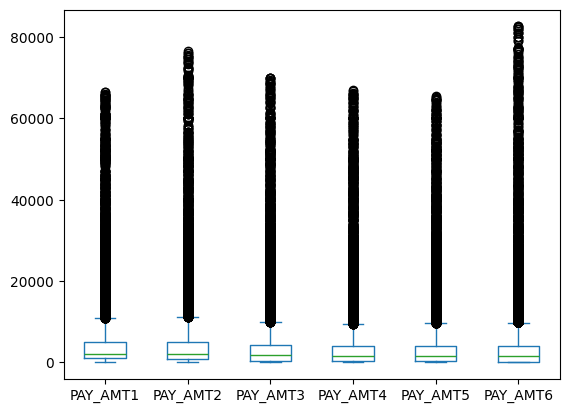

In [69]:
credit_risk_data[["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]].plot(kind='box')

#Var14 AGE Cleaning

AGE
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
57     122
58     122
59      83
21      67
60      67
61      56
62      44
64      31
63      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
75       3
71       3
72       3
79       1
74       1
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='AGE'>

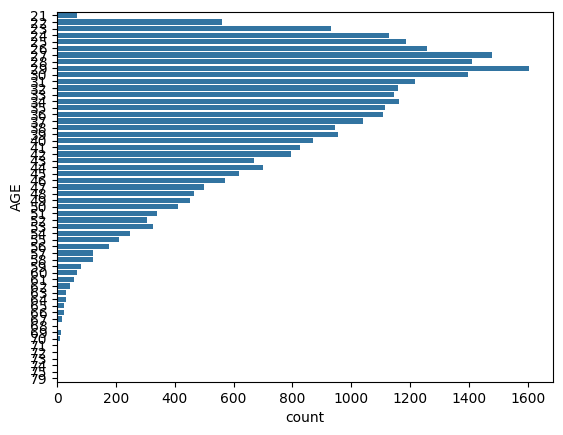

In [70]:
print(credit_risk_data['AGE'].value_counts())
sns.countplot(y="AGE",  data=credit_risk_data)

In [71]:
credit_risk_data.loc[credit_risk_data['AGE'] > 60, 'AGE'] = credit_risk_data['AGE'].median()

In [72]:
# percentile distribution for new variable
age_percentiles1=credit_risk_data['AGE'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
round(age_percentiles1,2)

,AGE
0.10,25.0
0.20,27.0
0.30,29.0
0.40,31.0
0.50,34.0
0.60,36.0
0.70,39.0
0.80,43.0
0.90,48.0
0.91,49.0


In [73]:
credit_risk_data


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,0,0,0,0,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,0,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,0,0,0,0,0,-90.5,78379.0,76304.0,52774.0,11855.0,48944.0,2100.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


#DROPPING OLD VARIBALES

In [74]:
# Credit_risk_data_v1 = credit_risk_data.drop(['EDUCATION_NEW','MARRIAGE_NEW', 'ID'], axis=1)

In [75]:
#COPYING THE CLEANED DATA FOR FURTHER ANALYSIS
Credit_risk_data_new = credit_risk_data.copy(deep=True)
Credit_risk_data_new.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,50000.0,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,500000.0,1,1,2,29,0,0,0,0,0,0,22381.5,21200.0,20088.5,19052.0,18104.5,17071.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,100000.0,2,2,2,23,0,0,0,0,0,0,11876.0,380.0,601.0,221.0,-200.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,140000.0,2,3,1,28,0,0,2,0,0,0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,20000.0,1,3,2,35,0,0,0,0,0,0,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


# Model Building
Select the right model, Include Feature Engineering, Perform Model Validation, Multiple models and performance comparison


In [76]:
# rename target varibale default_payment_next_month
Credit_risk_data_new.rename(columns={'default.payment.next.month': 'default_payment_next_month'}, inplace=True)
Credit_risk_data_new

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,20000.0,2,2,1,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,0,0,0,0,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,0,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,0,0,0,0,0,-90.5,78379.0,76304.0,52774.0,11855.0,48944.0,2100.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


# TRAIN TEST SPLIT

In [77]:
# CREATING X ARRAY THAT WILL CONTAIN FEATURES AND Y ARRAY THAT CONTAIN TARGET VARIABLE
X=Credit_risk_data_new.drop(['default_payment_next_month'], axis=1)
y=Credit_risk_data_new[['default_payment_next_month']]

# IMPERTING THE PACAKAGE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

#CHEAKING THE SHAPE OF THE TRAIN AND TEST DATA
print('X_Train', X_train.shape)
print('X_Test', X_test.shape)
print('Y_Train', y_train.shape)
print('Y_Test', y_test.shape)

X_Train (24000, 23)
X_Test (6000, 23)
Y_Train (24000, 1)
Y_Test (6000, 1)


# Logictic Regression

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [79]:
# logictic regression
from sklearn.linear_model import LogisticRegression
logistic= LogisticRegression()
logistic.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
print("Intercept", logistic.intercept_)
print("Coefficients", logistic.coef_)

Intercept [-5.02244936e-06]
Coefficients [[-4.46577769e-06 -8.74557413e-06 -1.06206529e-05 -9.37979911e-06
  -1.51749706e-04  1.31848962e-05  1.00864554e-05  8.38222469e-06
   7.77647503e-06  7.38436864e-06  6.66865332e-06 -4.04633550e-06
   4.74477629e-07  1.22451573e-06  1.95105568e-06  4.46545843e-07
   4.32200710e-06 -3.16075300e-05 -5.63024231e-05 -3.16012084e-05
  -1.67883200e-05 -2.32882990e-05 -1.45552098e-05]]


In [81]:
# model validation by creating confusion matrix
predict=logistic.predict(X_test)
predict

cm = confusion_matrix(y_test,predict)
print(cm)

[[4733    0]
 [1267    0]]


In [82]:
print("col sums", sum(cm))
total=sum(sum(cm))
print("Total", total)

col sums [6000    0]
Total 6000


In [83]:
accuracy=(cm[0,0]+cm[1,1])/total
accuracy

np.float64(0.7888333333333334)

In [84]:
predict=logistic.predict(X_train)
predict

cm = confusion_matrix(y_train,predict)
print(cm)

[[18630     1]
 [ 5367     2]]


In [85]:
print("col sums", sum(cm))
total=sum(sum(cm))
print("Total", total)

col sums [23997     3]
Total 24000


In [86]:
accuracy=(cm[0,0]+cm[1,1])/total
accuracy

np.float64(0.7763333333333333)

#Multicollinearity

In [87]:
import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [88]:
vif_cal(input_data=Credit_risk_data_new, dependent_col="default_payment_next_month")

LIMIT_BAL  VIF =  1.36
SEX  VIF =  1.02
EDUCATION  VIF =  1.13
MARRIAGE  VIF =  1.22
AGE  VIF =  1.27
PAY_1  VIF =  2.03
PAY_2  VIF =  2.66
PAY_3  VIF =  2.58
PAY_4  VIF =  3.02
PAY_5  VIF =  3.3
PAY_6  VIF =  2.32
BILL_AMT1  VIF =  7.23
BILL_AMT2  VIF =  11.64
BILL_AMT3  VIF =  9.37
BILL_AMT4  VIF =  8.34
BILL_AMT5  VIF =  9.82
BILL_AMT6  VIF =  6.85
PAY_AMT1  VIF =  1.37
PAY_AMT2  VIF =  1.36
PAY_AMT3  VIF =  1.31
PAY_AMT4  VIF =  1.32
PAY_AMT5  VIF =  1.33
PAY_AMT6  VIF =  1.21


BILL_AMT VARIBALE HAS VIF GREATER THAN 5 SO WE HAVE TO DROP THEM SEQUENTIALLY

In [89]:
# Drop the variable with highest VIF
vif_cal(input_data=Credit_risk_data_new.drop("BILL_AMT2", axis=1), dependent_col="default_payment_next_month")

LIMIT_BAL  VIF =  1.36
SEX  VIF =  1.02
EDUCATION  VIF =  1.13
MARRIAGE  VIF =  1.22
AGE  VIF =  1.27
PAY_1  VIF =  2.03
PAY_2  VIF =  2.66
PAY_3  VIF =  2.58
PAY_4  VIF =  3.02
PAY_5  VIF =  3.3
PAY_6  VIF =  2.32
BILL_AMT1  VIF =  4.16
BILL_AMT3  VIF =  7.23
BILL_AMT4  VIF =  8.33
BILL_AMT5  VIF =  9.82
BILL_AMT6  VIF =  6.84
PAY_AMT1  VIF =  1.33
PAY_AMT2  VIF =  1.35
PAY_AMT3  VIF =  1.31
PAY_AMT4  VIF =  1.32
PAY_AMT5  VIF =  1.33
PAY_AMT6  VIF =  1.21


In [90]:
vif_cal(input_data=Credit_risk_data_new.drop(["BILL_AMT2","BILL_AMT5"], axis=1), dependent_col="default_payment_next_month")

LIMIT_BAL  VIF =  1.36
SEX  VIF =  1.02
EDUCATION  VIF =  1.13
MARRIAGE  VIF =  1.22
AGE  VIF =  1.27
PAY_1  VIF =  2.03
PAY_2  VIF =  2.66
PAY_3  VIF =  2.58
PAY_4  VIF =  3.02
PAY_5  VIF =  3.3
PAY_6  VIF =  2.32
BILL_AMT1  VIF =  4.16
BILL_AMT3  VIF =  7.2
BILL_AMT4  VIF =  6.95
BILL_AMT6  VIF =  4.05
PAY_AMT1  VIF =  1.33
PAY_AMT2  VIF =  1.35
PAY_AMT3  VIF =  1.31
PAY_AMT4  VIF =  1.27
PAY_AMT5  VIF =  1.31
PAY_AMT6  VIF =  1.21


In [91]:
vif_cal(input_data=Credit_risk_data_new.drop(["BILL_AMT2","BILL_AMT5","BILL_AMT3"], axis=1), dependent_col="default_payment_next_month")

LIMIT_BAL  VIF =  1.36
SEX  VIF =  1.02
EDUCATION  VIF =  1.13
MARRIAGE  VIF =  1.22
AGE  VIF =  1.27
PAY_1  VIF =  2.03
PAY_2  VIF =  2.66
PAY_3  VIF =  2.58
PAY_4  VIF =  3.02
PAY_5  VIF =  3.3
PAY_6  VIF =  2.32
BILL_AMT1  VIF =  2.93
BILL_AMT4  VIF =  5.12
BILL_AMT6  VIF =  4.03
PAY_AMT1  VIF =  1.32
PAY_AMT2  VIF =  1.32
PAY_AMT3  VIF =  1.3
PAY_AMT4  VIF =  1.27
PAY_AMT5  VIF =  1.31
PAY_AMT6  VIF =  1.21


In [92]:
vif_cal(input_data=Credit_risk_data_new.drop(["BILL_AMT2","BILL_AMT5","BILL_AMT3","BILL_AMT4"], axis=1), dependent_col="default_payment_next_month")

LIMIT_BAL  VIF =  1.35
SEX  VIF =  1.02
EDUCATION  VIF =  1.13
MARRIAGE  VIF =  1.22
AGE  VIF =  1.27
PAY_1  VIF =  2.03
PAY_2  VIF =  2.66
PAY_3  VIF =  2.58
PAY_4  VIF =  3.02
PAY_5  VIF =  3.3
PAY_6  VIF =  2.32
BILL_AMT1  VIF =  2.25
BILL_AMT6  VIF =  2.35
PAY_AMT1  VIF =  1.32
PAY_AMT2  VIF =  1.31
PAY_AMT3  VIF =  1.27
PAY_AMT4  VIF =  1.27
PAY_AMT5  VIF =  1.3
PAY_AMT6  VIF =  1.21


In [93]:
Credit_risk_data_new_v1 = Credit_risk_data_new.drop(["BILL_AMT2","BILL_AMT5","BILL_AMT3","BILL_AMT4"], axis=1)
Credit_risk_data_new_v1

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,20000.0,2,2,1,24,2,2,0,0,0,0,3913.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,0,2,0,0,0,2,2682.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,0,0,0,0,0,0,1683.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,0,0,0,3565.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,0,0,0,0,0,-90.5,48944.0,2100.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


# Individual Impact of Variables (P Value)

In [94]:
import statsmodels.api as sm
m1=sm.Logit(Credit_risk_data_new_v1['default_payment_next_month'],Credit_risk_data_new_v1[["LIMIT_BAL"]+['SEX']+['EDUCATION']+['MARRIAGE']+['AGE']+['PAY_1']+['PAY_2']+['PAY_3']+['PAY_4']+['PAY_5']+['PAY_6']+['BILL_AMT1']+['BILL_AMT6']+['PAY_AMT1']+['PAY_AMT2']+['PAY_AMT3']+['PAY_AMT4']+['PAY_AMT5']+['PAY_AMT6']])
m1.fit()
print(m1.fit().summary())

Optimization terminated successfully.
         Current function value: 0.445375
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.445375
         Iterations 6
                               Logit Regression Results                               
Dep. Variable:     default_payment_next_month   No. Observations:                30000
Model:                                  Logit   Df Residuals:                    29981
Method:                                   MLE   Df Model:                           18
Date:                        Sun, 25 May 2025   Pseudo R-squ.:                  0.1572
Time:                                13:34:21   Log-Likelihood:                -13361.
converged:                               True   LL-Null:                       -15853.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------

P value of PAY2, BILL_AMT1 and BILL_AMT2 is greater than 0.05 so we drop that varibales

In [95]:
m1=sm.Logit(Credit_risk_data_new_v1['default_payment_next_month'],Credit_risk_data_new_v1[["LIMIT_BAL"]+['SEX']+['EDUCATION']+['MARRIAGE']+['AGE']+['PAY_1']+['PAY_3']+['PAY_4']+['PAY_5']+['PAY_6']+['PAY_AMT1']+['PAY_AMT2']+['PAY_AMT3']+['PAY_AMT4']+['PAY_AMT5']+['PAY_AMT6']])
m1.fit()
print(m1.fit().summary())

Optimization terminated successfully.
         Current function value: 0.445512
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.445512
         Iterations 6
                               Logit Regression Results                               
Dep. Variable:     default_payment_next_month   No. Observations:                30000
Model:                                  Logit   Df Residuals:                    29984
Method:                                   MLE   Df Model:                           15
Date:                        Sun, 25 May 2025   Pseudo R-squ.:                  0.1569
Time:                                13:34:21   Log-Likelihood:                -13365.
converged:                               True   LL-Null:                       -15853.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------

In [96]:
Credit_risk_data_new_v1 = Credit_risk_data_new_v1.drop(["PAY_2","BILL_AMT1","BILL_AMT6"], axis=1)
Credit_risk_data_new_v1

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,20000.0,2,2,1,24,2,0,0,0,0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,0,0,0,0,2,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,0,0,0,0,0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,0,0,0,0,0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,2,0,0,0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,0,0,0,0,2100.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


#Model Validation after dropping variables

In [97]:
Credit_risk_data_new_v1.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default_payment_next_month'],
      dtype='object')

In [98]:
from sklearn.linear_model import LogisticRegression
logistic1= LogisticRegression()
logistic1.fit(Credit_risk_data_new_v1[['LIMIT_BAL']+['SEX']+['EDUCATION']+ ['MARRIAGE']+['AGE']+['PAY_1']+['PAY_3']+['PAY_4']+['PAY_5']+['PAY_6']+['PAY_AMT1']+['PAY_AMT2']+['PAY_AMT3']+['PAY_AMT4']+ ['PAY_AMT5']+['PAY_AMT6']],Credit_risk_data_new_v1[['default_payment_next_month']])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [99]:
predict1=logistic1.predict(Credit_risk_data_new_v1[['LIMIT_BAL']+['SEX']+['EDUCATION']+ ['MARRIAGE']+['AGE']+['PAY_1']+['PAY_3']+['PAY_4']+['PAY_5']+['PAY_6']+['PAY_AMT1']+['PAY_AMT2']+['PAY_AMT3']+['PAY_AMT4']+ ['PAY_AMT5']+['PAY_AMT6']])
predict1

cm1 = confusion_matrix(Credit_risk_data_new_v1[['default_payment_next_month']],predict1)
print(cm1)

[[22483   881]
 [ 5006  1630]]


In [100]:
print("col sums", sum(cm1))
total1=sum(sum(cm1))
print("Total", total1)

col sums [27489  2511]
Total 30000


In [101]:
accuracy1=(cm1[0,0]+cm1[1,1])/total1
accuracy1

np.float64(0.8037666666666666)

#DECISION TREE

In [102]:
#p1=0.5 and p2=0.5
import math
entropy=-0.5*math.log2(0.5) -0.5*math.log2(0.5)
print("Entropy for 50%-50% case ==>", entropy)

Entropy for 50%-50% case ==> 1.0


In [103]:
entropy=-0.0001*math.log2(0.0001) -0.9999*math.log2(0.9999)
print("Entropy for 0%-100% case ==>", entropy)

Entropy for 0%-100% case ==> 0.0014730335283281598


In [104]:
import math
entropy=-0.45*math.log2(0.45) -0.55*math.log2(0.55)
print("Entropy for 45%-55% case ==>", entropy)

entropy=-0.05*math.log2(0.05) -0.95*math.log2(0.95)
print("Entropy for 5%-95% case ==>", entropy)

Entropy for 45%-55% case ==> 0.9927744539878083
Entropy for 5%-95% case ==> 0.28639695711595625


In [105]:
Credit_risk_data_new_v1.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default_payment_next_month'],
      dtype='object')

In [106]:
# CREATING X ARRAY THAT WILL CONTAIN FEATURES AND Y ARRAY THAT CONTAIN TARGET VARIABLE
X=Credit_risk_data_new_v1.drop(['default_payment_next_month'], axis=1)
y=Credit_risk_data_new_v1[['default_payment_next_month']]

# IMPERTING THE PACAKAGE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

#CHEAKING THE SHAPE OF THE TRAIN AND TEST DATA
print('X_Train', X_train.shape)
print('X_Test', X_test.shape)
print('Y_Train', y_train.shape)
print('Y_Test', y_test.shape)

X_Train (24000, 16)
X_Test (6000, 16)
Y_Train (24000, 1)
Y_Test (6000, 1)


|--- PAY_1 <= 1.50
|   |--- PAY_1 <= 0.50
|   |   |--- PAY_3 <= 1.00
|   |   |   |--- class: 0
|   |   |--- PAY_3 >  1.00
|   |   |   |--- class: 0
|   |--- PAY_1 >  0.50
|   |   |--- PAY_4 <= 0.50
|   |   |   |--- class: 0
|   |   |--- PAY_4 >  0.50
|   |   |   |--- class: 0
|--- PAY_1 >  1.50
|   |--- PAY_6 <= 1.00
|   |   |--- EDUCATION <= 3.50
|   |   |   |--- class: 1
|   |   |--- EDUCATION >  3.50
|   |   |   |--- class: 0
|   |--- PAY_6 >  1.00
|   |   |--- PAY_AMT3 <= 12150.00
|   |   |   |--- class: 1
|   |   |--- PAY_AMT3 >  12150.00
|   |   |   |--- class: 0



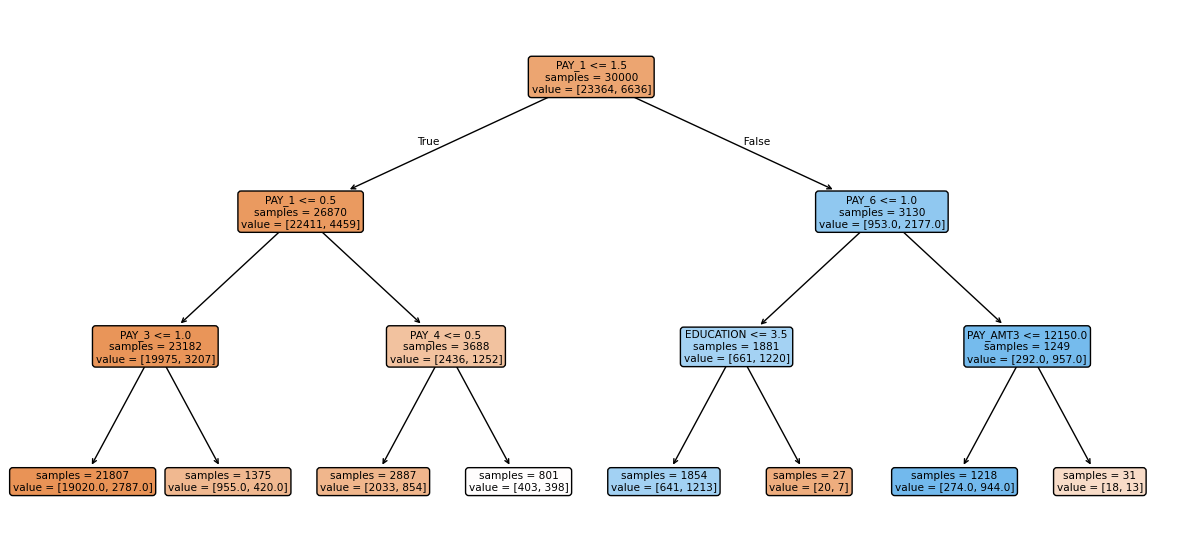

In [107]:
#Building Tree Model
features = X.columns
from sklearn import tree
DTree = tree.DecisionTreeClassifier(max_depth=3)
DTree.fit(X,y)

##Plotting the trees
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(15,7))
plot_tree(DTree, filled=True,
                     rounded=True,
                     impurity=False,
                     feature_names = features)
print( export_text(DTree, feature_names = features))

In [108]:
##########Tree Validation
#Tree Validation
predict1 = DTree.predict(X)

from sklearn.metrics import confusion_matrix ###for using confusion matrix###
cm = confusion_matrix(y, predict1)
print (cm)

total = sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy = (cm[0,0]+cm[1,1])/total
print(accuracy)

[[22449   915]
 [ 4479  2157]]
0.8202


In [109]:
#training Tree Model
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

predict1 = clf.predict(X_train)
predict2 = clf.predict(X_test)

#On Train Data
cm1 = confusion_matrix(y_train,predict1)
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print("Train Accuracy", accuracy1)

#On Test Data
cm2 = confusion_matrix(y_test,predict2)
total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print("Test Accuracy", accuracy2)

Train Accuracy 0.9987083333333333
Test Accuracy 0.7253333333333334


#Purning

max_leaf_nodes - finetuning

In [110]:
#training Tree Model
clf = tree.DecisionTreeClassifier(max_leaf_nodes = 90)
clf.fit(X_train,y_train)

predict1 = clf.predict(X_train)
predict2 = clf.predict(X_test)

#On Train Data
cm1 = confusion_matrix(y_train,predict1)
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print("Train Accuracy", accuracy1)

#On Test Data
cm2 = confusion_matrix(y_test,predict2)
total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print("Test Accuracy", accuracy2)

Train Accuracy 0.8290416666666667
Test Accuracy 0.822


# Model Validation
Confusion matrix, Sensitivity, Specificity, F1 Score, Recall, Precision etc.

In [111]:
## Function for OLS formula
def ols_formula(df, dependent_var, *excluded_cols):
    '''
    Generates the y~x style formula for statsmodels (patsy) given
    the dataframe, dependent variable and optional excluded columns
    as strings
    '''
    df_columns = list(df.columns.values)
    df_columns.remove(dependent_var)
    for col in excluded_cols:
        df_columns.remove(col)
    return dependent_var + ' ~ ' + ' + '.join(df_columns)

In [112]:
model_formula=ols_formula(Credit_risk_data_new_v1.iloc[:,1:], dependent_var="default_payment_next_month")
print(model_formula)

default_payment_next_month ~ SEX + EDUCATION + MARRIAGE + AGE + PAY_1 + PAY_3 + PAY_4 + PAY_5 + PAY_6 + PAY_AMT1 + PAY_AMT2 + PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6


# Sensitivity and Specificity

In [113]:
import statsmodels.formula.api as sm

default_model=sm.logit(model_formula, data=Credit_risk_data_new_v1)
results=default_model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.445565
         Iterations 6
                               Logit Regression Results                               
Dep. Variable:     default_payment_next_month   No. Observations:                30000
Model:                                  Logit   Df Residuals:                    29984
Method:                                   MLE   Df Model:                           15
Date:                        Sun, 25 May 2025   Pseudo R-squ.:                  0.1568
Time:                                13:34:26   Log-Likelihood:                -13367.
converged:                               True   LL-Null:                       -15853.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2485      0.124    -10.101 

In [114]:
#####Create the confusion matrix
###predict the variable active customer from logistic fit####
predictions = results.predict()
print(predictions[0:10])
len(predictions)

[0.54984375 0.19162873 0.13739685 0.15698371 0.0876271  0.16099405
 0.01744718 0.14208483 0.19983626 0.15095635]


30000

In [115]:
### Converting predicted values into classes using threshold
threshold=0.5
predicted_class1=[ 0 if x < threshold else 1 for x in predictions]
print(predicted_class1[0:10])

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [116]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(Credit_risk_data_new_v1["default_payment_next_month"],predicted_class1)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[22375   989]
 [ 4499  2137]]
Accuracy :  0.8170666666666667
Sensitivity :  0.9576699195343263
Specificity :  0.3220313441832429


In [117]:
###Sensitivity vs Specificity with Different Thresholds
### Converting predicted values into classes using new threshold
threshold=0.2
predicted_class1=[ 0 if x < threshold else 1 for x in predictions]

#Change in Confusion Matrix, Accuracy and Sensitivity-Specificity
#Confusion matrix, Accuracy, sensitivity and specificity
cm1 = confusion_matrix(Credit_risk_data_new_v1["default_payment_next_month"],predicted_class1)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[19178  4186]
 [ 2761  3875]]
Accuracy :  0.7684333333333333
Sensitivity :  0.8208354733778462
Specificity :  0.5839361060880048


# Precision, Recall and F1 Score

In [118]:
predictions = results.predict()
### Converting predicted values into classes using threshold
threshold=0.2
predicted_class1=[ 0 if x < threshold else 1 for x in predictions]

cm1 = confusion_matrix(Credit_risk_data_new_v1["default_payment_next_month"],predicted_class1)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

Precision_Class0 = cm1[0,0]/(cm1[0,0]+cm1[1,0])
print('Precision_Class0 : ', Precision_Class0 )

Recall_Class0 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Recall_Class0 : ', Recall_Class0 )

F1_Class0 = 2/((1/Precision_Class0)+(1/Recall_Class0))
print('F1_Class0 : ', F1_Class0 )


Precision_Class1 = cm1[1,1]/(cm1[0,1]+cm1[1,1])
print('Precision_Class1 : ', Precision_Class1 )

Recall_Class1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Recall_Class1 : ', Recall_Class1 )

F1_Class1 = 2/((1/Precision_Class1)+(1/Recall_Class1))
print('F1_Class1 : ', F1_Class1 )



Confusion Matrix : 
 [[19178  4186]
 [ 2761  3875]]
Accuracy :  0.7684333333333333
Precision_Class0 :  0.874151055198505
Recall_Class0 :  0.8208354733778462
F1_Class0 :  0.8466547469262522
Precision_Class1 :  0.4807095893809701
Recall_Class1 :  0.5839361060880048
F1_Class1 :  0.5273185003742261


In [119]:
from sklearn.metrics import classification_report
print(classification_report(Credit_risk_data_new_v1["default_payment_next_month"],predicted_class1))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85     23364
           1       0.48      0.58      0.53      6636

    accuracy                           0.77     30000
   macro avg       0.68      0.70      0.69     30000
weighted avg       0.79      0.77      0.78     30000



#ROC

In [120]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual = Credit_risk_data_new_v1["default_payment_next_month"]
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
print("false_positive_rate", false_positive_rate)
print("true_positive_rate", true_positive_rate)
print("thresholds", thresholds)

false_positive_rate [0.         0.         0.         ... 0.99798836 0.99798836 1.        ]
true_positive_rate [0.00000000e+00 1.50693189e-04 6.02772755e-04 ... 9.99849307e-01
 1.00000000e+00 1.00000000e+00]
thresholds [       inf 0.9997267  0.99971011 ... 0.01731215 0.0170661  0.00477695]


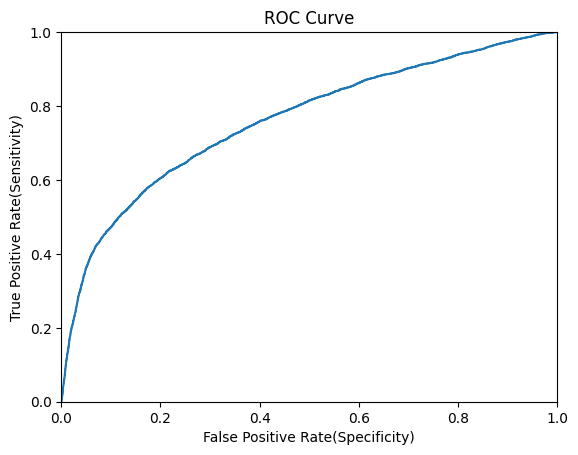

In [121]:
import matplotlib.pyplot as plt
plt.title('ROC Curve')
#Drawing ROC Curve
plt.plot(false_positive_rate, true_positive_rate)

#X and Y  Axis Limits
plt.xlim([-0,1])
plt.ylim([-0,1])

# Labels
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

#AUC

In [122]:
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

np.float64(0.7604838381361659)

#Handeling Class Imbalanace

In [123]:
print("Actual Data :", Credit_risk_data_new_v1.shape)

#Frequency count on target column
freq=Credit_risk_data_new_v1['default_payment_next_month'].value_counts()
print(freq)
print((freq/freq.sum())*100)

#Classwise data
credit_risk_class0 = Credit_risk_data_new_v1[Credit_risk_data_new_v1['default_payment_next_month'] == 0]
credit_risk_class1 = Credit_risk_data_new_v1[Credit_risk_data_new_v1['default_payment_next_month'] == 1]

print("Class0 Actual :", credit_risk_class0.shape)
print("Class1 Actual  :", credit_risk_class1.shape)


Actual Data : (30000, 17)
default_payment_next_month
0    23364
1     6636
Name: count, dtype: int64
default_payment_next_month
0    77.88
1    22.12
Name: count, dtype: float64
Class0 Actual : (23364, 17)
Class1 Actual  : (6636, 17)


#Undersampling and Oversampling

In [124]:
##Undersampling of class-0
## Consider half of class-0
credit_risk_class0_under = credit_risk_class0.sample(int(0.7*len(credit_risk_class0)))
print("Class0 Undersample :", credit_risk_class0_under.shape)

##Oversampling of Class-1
# Lets increase the size by four times
credit_risk_class1_over = credit_risk_class1.sample(2*len(credit_risk_class1),replace=True)
print("Class1 Oversample :", credit_risk_class1_over.shape)

#Concatenate to create the final balanced data
credit_risk_balanced=pd.concat([credit_risk_class0_under,credit_risk_class1_over])
print("Final Balannced Data :", credit_risk_balanced.shape)

#Frequency count on target column in the balanced data
freq=credit_risk_balanced['default_payment_next_month'].value_counts()
print(freq)
print((freq/freq.sum())*100)


Class0 Undersample : (16354, 17)
Class1 Oversample : (13272, 17)
Final Balannced Data : (29626, 17)
default_payment_next_month
0    16354
1    13272
Name: count, dtype: int64
default_payment_next_month
0    55.201512
1    44.798488
Name: count, dtype: float64


#Model with Balanced Data

In [125]:
#model with balanced data
model_formula=ols_formula(credit_risk_balanced.iloc[:,:], dependent_var="default_payment_next_month")
print(model_formula)

default_payment_next_month ~ LIMIT_BAL + SEX + EDUCATION + MARRIAGE + AGE + PAY_1 + PAY_3 + PAY_4 + PAY_5 + PAY_6 + PAY_AMT1 + PAY_AMT2 + PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6


In [126]:
default_model=sm.logit(model_formula, data=credit_risk_balanced)
results=default_model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.575521
         Iterations 6
                               Logit Regression Results                               
Dep. Variable:     default_payment_next_month   No. Observations:                29626
Model:                                  Logit   Df Residuals:                    29609
Method:                                   MLE   Df Model:                           16
Date:                        Sun, 25 May 2025   Pseudo R-squ.:                  0.1632
Time:                                13:34:26   Log-Likelihood:                -17050.
converged:                               True   LL-Null:                       -20375.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0425      0.106      0.400 

#Updated Sensitivity and Specificity

In [127]:
#####Create the confusion matrix
###predict the variable active customer from logistic fit####
predictions = results.predict()
threshold=0.2
predicted_class1=[ 0 if x < threshold else 1 for x in predictions]

cm1 = confusion_matrix(credit_risk_balanced["default_payment_next_month"],predicted_class1)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[ 1550 14804]
 [  276 12996]]
Accuracy :  0.49098764598663336
Sensitivity :  0.09477803595450654
Specificity :  0.9792043399638336


## SMOTE for Handling Class Imbalance

In [128]:
print("Actual Data :", Credit_risk_data_new_v1.shape)

#Frequency count on target column
freq=Credit_risk_data_new_v1['default_payment_next_month'].value_counts()
print(freq)
print((freq/freq.sum())*100)

#Classwise data
credit_risk_class0 = Credit_risk_data_new_v1[Credit_risk_data_new_v1['default_payment_next_month'] == 0]
credit_risk_class1 = Credit_risk_data_new_v1[Credit_risk_data_new_v1['default_payment_next_month'] == 1]

print("Class0 Actual :", credit_risk_class0.shape)
print("Class1 Actual  :", credit_risk_class1.shape)


Actual Data : (30000, 17)
default_payment_next_month
0    23364
1     6636
Name: count, dtype: int64
default_payment_next_month
0    77.88
1    22.12
Name: count, dtype: float64
Class0 Actual : (23364, 17)
Class1 Actual  : (6636, 17)


#Visualizing Imbalance Data

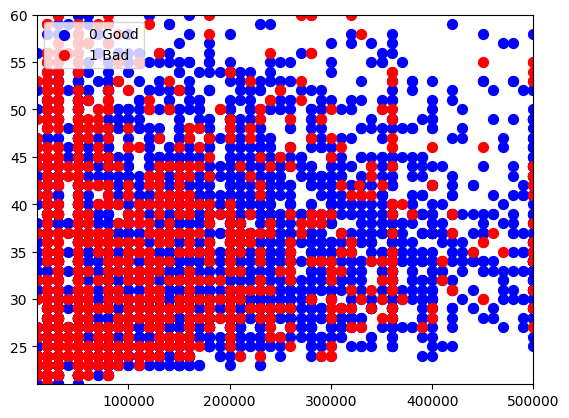

In [129]:
import matplotlib.pyplot as plt
Credit_risk_data_new_v2=Credit_risk_data_new_v1.sample(5000)
fig = plt.figure()
ax1 = fig.add_subplot(111)

var1="LIMIT_BAL"
var2="AGE"

ax1.scatter(Credit_risk_data_new_v2[var1][Credit_risk_data_new_v2.default_payment_next_month==0],Credit_risk_data_new_v2[var2][Credit_risk_data_new_v2.default_payment_next_month==0], s=50, c='b', marker="o", label='0 Good')
ax1.scatter(Credit_risk_data_new_v2[var1][Credit_risk_data_new_v2.default_payment_next_month==1],Credit_risk_data_new_v2[var2][Credit_risk_data_new_v2.default_payment_next_month==1], s=50, c='r', marker="o", label='1 Bad')

plt.xlim(min(Credit_risk_data_new_v2[var1]), max(Credit_risk_data_new_v2[var1]))
plt.ylim(min(Credit_risk_data_new_v2[var2]), max(Credit_risk_data_new_v2[var2]))
plt.legend(loc='upper left');

plt.show()

#SMOTE Function

In [130]:
print(Credit_risk_data_new_v1.columns)
# X_train=Credit_risk_data_new_v1.iloc[:,:1]
# y_train=Credit_risk_data_new_v1["default_payment_next_month"]
print(X_train.shape)
print(y_train.shape)
print(X_train.columns)
print(y_train.columns)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default_payment_next_month'],
      dtype='object')
(24000, 16)
(24000, 1)
Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')
Index(['default_payment_next_month'], dtype='object')


In [131]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 2)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

import collections
print("Before SMOTE", collections.Counter(y_train))
print("After SMOTE", collections.Counter(y_train_smote))

Before SMOTE Counter({'default_payment_next_month': 1})
After SMOTE Counter({'default_payment_next_month': 1})


Mention the sample size

In [132]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.6, random_state = 2)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

import collections
print("Before SMOTE", collections.Counter(y_train))
print("After SMOTE", collections.Counter(y_train_smote))

Before SMOTE Counter({'default_payment_next_month': 1})
After SMOTE Counter({'default_payment_next_month': 1})


In [133]:
credit_smote=X_train_smote
credit_smote["default_payment_next_month"]=y_train_smote

### Visulaizing balanced data after SMOTE

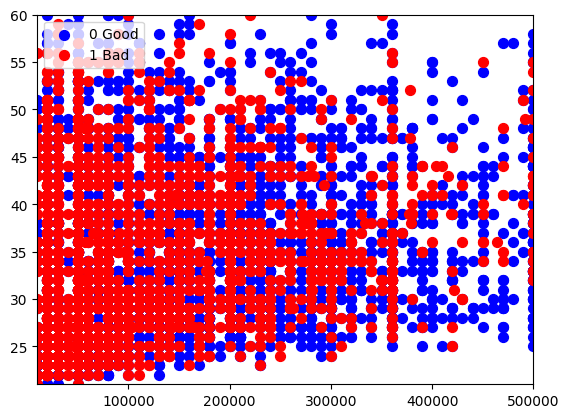

In [134]:
import matplotlib.pyplot as plt
Credit_risk_data_new_v2=credit_smote.sample(5000)
fig = plt.figure()
ax1 = fig.add_subplot(111)

var1="LIMIT_BAL"
var2="AGE"

ax1.scatter(Credit_risk_data_new_v2[var1][Credit_risk_data_new_v2.default_payment_next_month==0],Credit_risk_data_new_v2[var2][Credit_risk_data_new_v2.default_payment_next_month==0], s=50, c='b', marker="o", label='0 Good')
ax1.scatter(Credit_risk_data_new_v2[var1][Credit_risk_data_new_v2.default_payment_next_month==1],Credit_risk_data_new_v2[var2][Credit_risk_data_new_v2.default_payment_next_month==1], s=50, c='r', marker="o", label='1 Bad')

plt.xlim(min(Credit_risk_data_new_v2[var1]), max(Credit_risk_data_new_v2[var1]))
plt.ylim(min(Credit_risk_data_new_v2[var2]), max(Credit_risk_data_new_v2[var2]))
plt.legend(loc='upper left');

plt.show()

#Model with balanced - SMOTE

In [135]:
#model with balanced- SMOTE
model_formula=ols_formula(credit_smote.iloc[:,:], dependent_var="default_payment_next_month")
print(model_formula)

default_payment_next_month ~ LIMIT_BAL + SEX + EDUCATION + MARRIAGE + AGE + PAY_1 + PAY_3 + PAY_4 + PAY_5 + PAY_6 + PAY_AMT1 + PAY_AMT2 + PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6


In [136]:
credit_risk_balanced=credit_smote
risk_model=sm.logit(model_formula, data=credit_risk_balanced)
results=risk_model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.547122
         Iterations 6
                               Logit Regression Results                               
Dep. Variable:     default_payment_next_month   No. Observations:                29809
Model:                                  Logit   Df Residuals:                    29792
Method:                                   MLE   Df Model:                           16
Date:                        Sun, 25 May 2025   Pseudo R-squ.:                  0.1730
Time:                                13:34:28   Log-Likelihood:                -16309.
converged:                               True   LL-Null:                       -19720.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7714      0.109     25.331 

#Updated Sensitivity and Specificity

In [137]:
#####Create the confusion matrix
###predict the variable active customer from logistic fit####
predictions = results.predict()
threshold=0.5
predicted_class1=[ 0 if x < threshold else 1 for x in predictions]

cm1 = confusion_matrix(credit_risk_balanced["default_payment_next_month"],predicted_class1)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[16499  2132]
 [ 5653  5525]]
Accuracy :  0.7388372639135832
Sensitivity :  0.8855670656432827
Specificity :  0.4942744677044194


#### Updated Precision, Recall and F1-Score

In [138]:
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

Precision_Class0 = cm1[0,0]/(cm1[0,0]+cm1[1,0])
print('Precision_Class0 : ', Precision_Class0 )

Recall_Class0 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Recall_Class0 : ', Recall_Class0 )

F1_Class0 = 2/((1/Precision_Class0)+(1/Recall_Class0))
print('F1_Class0 : ', F1_Class0 )


Precision_Class1 = cm1[1,1]/(cm1[0,1]+cm1[1,1])
print('Precision_Class1 : ', Precision_Class1 )

Recall_Class1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Recall_Class1 : ', Recall_Class1 )

F1_Class1 = 2/((1/Precision_Class1)+(1/Recall_Class1))
print('F1_Class1 : ', F1_Class1 )

Accuracy :  0.7388372639135832
Precision_Class0 :  0.7448085951607079
Recall_Class0 :  0.8855670656432827
F1_Class0 :  0.8091116396537773
Precision_Class1 :  0.7215619694397284
Recall_Class1 :  0.4942744677044194
F1_Class1 :  0.5866737456862224


In [139]:
from sklearn.metrics import classification_report
print(classification_report(credit_risk_balanced["default_payment_next_month"],predicted_class1))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81     18631
           1       0.72      0.49      0.59     11178

    accuracy                           0.74     29809
   macro avg       0.73      0.69      0.70     29809
weighted avg       0.74      0.74      0.73     29809



#Desicion Tree Result

In [140]:
# Split credit data into 2 part credit_train 80% and credit_test 20%

credit_train, credit_test = train_test_split(Credit_risk_data_new_v1, test_size=0.2, random_state=42)

print("Shape of credit_train:", credit_train.shape)
print("Shape of credit_test:", credit_test.shape)

Shape of credit_train: (24000, 17)
Shape of credit_test: (6000, 17)


In [141]:
features=list(credit_train.columns[:16])
X_train=credit_train[features]
y_train=credit_train['default_payment_next_month']
print(features)

['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [142]:
###buildng Decision tree on the training data ####
clf = tree.DecisionTreeClassifier(max_depth=6)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [143]:
#####predicting on test data ####
tree_predict_train=clf.predict(credit_train[features])
tree_predict=clf.predict(credit_test[features])

########Train Data Validation
cm1 = confusion_matrix(credit_train[['default_payment_next_month']],tree_predict_train)
print("Confusion Matrix for Train data \n", cm1)
total1=sum(sum(cm1))
accuracy_tree=(cm1[0,0]+cm1[1,1])/total1
print("Accuracy of Train data \n", accuracy_tree)

########Test Data Validation
cm1 = confusion_matrix(credit_test[['default_payment_next_month']],tree_predict)
print("Confusion Matrix for test data \n", cm1)
total1=sum(sum(cm1))
accuracy_tree=(cm1[0,0]+cm1[1,1])/total1
print("Accuracy of test data \n", accuracy_tree)

Confusion Matrix for Train data 
 [[17731   946]
 [ 3244  2079]]
Accuracy of Train data 
 0.8254166666666667
Confusion Matrix for test data 
 [[4420  267]
 [ 828  485]]
Accuracy of test data 
 0.8175


#Random Forest

In [144]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=20, max_features=4, max_depth=6)
# n_estimators - Trees - As high as possible
# max_features - p - low ==>(sqrt(t))
# max_depth - Slightly higher than single tree
forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, max_features=4, n_estimators=20)

In [145]:
#####predicting on test data ####
Forest_predict_train=forest.predict(credit_train[features])
Forest_predict=forest.predict(credit_test[features])

########Train Data Validation
cm1 = confusion_matrix(credit_train[['default_payment_next_month']],Forest_predict_train)
print("Confusion Matrix for Train data \n", cm1)
total1=sum(sum(cm1))
accuracy_tree=(cm1[0,0]+cm1[1,1])/total1
print("Accuracy of Train data \n", accuracy_tree)

########Test Data Validation
cm1 = confusion_matrix(credit_test[['default_payment_next_month']],Forest_predict)
print("Confusion Matrix for test data \n", cm1)
total1=sum(sum(cm1))
accuracy_tree=(cm1[0,0]+cm1[1,1])/total1
print("Accuracy of test data \n", accuracy_tree)


Confusion Matrix for Train data 
 [[17850   827]
 [ 3355  1968]]
Accuracy of Train data 
 0.82575
Confusion Matrix for test data 
 [[4451  236]
 [ 854  459]]
Accuracy of test data 
 0.8183333333333334


#Boosted Model

In [146]:
import pandas as pd
import sklearn as sk
import numpy as np
import scipy as sp
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import time
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from xgboost.sklearn import XGBClassifier
from sklearn import preprocessing

In [147]:
from sklearn.ensemble import GradientBoostingClassifier
boost=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1, verbose=1)
##fitting the gradient boost classifier
start_time = time.time()
boost.fit(X_train,y_train)
print("Time taken by GBM "+ str((time.time() - start_time))+ " Seconds")

      Iter       Train Loss   Remaining Time 
         1           1.0213            4.36s
         2           0.9944            4.29s
         3           0.9728            4.29s
         4           0.9563            4.28s
         5           0.9423            4.26s
         6           0.9309            4.29s
         7           0.9213            4.27s
         8           0.9135            4.20s
         9           0.9060            4.15s
        10           0.8999            4.09s
        20           0.8706            3.62s
        30           0.8607            3.16s
        40           0.8552            2.70s
        50           0.8511            2.25s
        60           0.8483            1.81s
        70           0.8462            1.35s
        80           0.8437            0.90s
        90           0.8414            0.45s
       100           0.8391            0.00s
Time taken by GBM 4.507394075393677 Seconds


#XGB Model

In [148]:
#Creating XGB Friendly data and matrices
train_labels = y_train.values
train_labels = preprocessing.LabelEncoder().fit_transform(train_labels)
test_labels = y_test.values
test_labels = preprocessing.LabelEncoder().fit_transform(test_labels)

matrix_train = xgboost.DMatrix(X_train,label=train_labels)
matrix_test = xgboost.DMatrix(X_test,label=test_labels)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [149]:
params = {
    'max_depth': 4,
    'eta':0.1, #Learning Rate
    'eval_metric':'merror', # Multiclass classification error rate.
    'tree_method' : "gpu_hist", # use this with colab in gpu mode for faster training
    'num_class': 9
}

start_time = time.time()

model=xgboost.train(params=params,
                    dtrain=matrix_train,
                    num_boost_round=300,    #Number of trees
                    early_stopping_rounds=4, # Stop after 4 rounds, if test error doesn't improve.
                    evals=[(matrix_test,'test')]
                   )

print("Time taken by XGB "+ str((time.time() - start_time))+ " Seconds")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:34:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[0]	test-merror:0.17267
[1]	test-merror:0.17333
[2]	test-merror:0.17283
[3]	test-merror:0.17200
[4]	test-merror:0.17200
[5]	test-merror:0.17233
[6]	test-merror:0.17217
[7]	test-merror:0.17250
Time taken by XGB 0.4141652584075928 Seconds


#XGB Result

In [150]:
###prediction using XGB on the train Data
boost_predict_train=model.predict(matrix_train)
cm1 = confusion_matrix(train_labels,boost_predict_train)
print(cm1)

accuracy_train=f1_score(train_labels, boost_predict_train, average='micro')
print("train accuracy", accuracy_train)

[[17838   839]
 [ 3418  1905]]
train accuracy 0.822625


In [151]:
###prediction using XGB on the test Data
boost_predict_test=model.predict(matrix_test)
cm1 = confusion_matrix(test_labels,boost_predict_test)
print(cm1)

accuracy_test=f1_score(test_labels, boost_predict_test, average='micro')
print("test accuracy", accuracy_test)

[[4513  220]
 [ 815  452]]
test accuracy 0.8275


# Model  Deployment
## Optional step